In [29]:
"""
bearing_classification.ipynb
Created by ST Chien, 08/20/2019 
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [2]:
##### PLZ IGNORE AND DONT EXECUTE THIS BLOCK IF UNESSCESSARY #####
# The shape of the original data(2048, 8192) proviede by BingHon(or, MatLab) is wrong, 
# The following code is to correct this error.
#trainingDataframe = pd.read_csv("../Dataset/data.csv", header = None)
#fixedDataframe = pd.DataFrame(trainingDataframe.values.reshape(2048, 8192))
#fixedDataframe.to_csv("../Dataset/reshaped_training_data.csv", index = False)

In [11]:
# Read the data
rawDataframe = pd.read_csv("../Dataset/reshaped_training_data.csv")
rawDataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,-17.624,-22.424,3.176,9.576,-25.624,-11.224,9.576,-78.424,49.576,33.576,...,14.056,94.056,-25.944,-9.9439,-25.944,54.056,30.056,6.0561,6.0561,-105.940
1,-43.224,-44.824,-11.224,-11.224,-19.224,-41.624,-8.024,39.976,4.776,38.376,...,30.056,134.060,-249.940,14.0560,54.056,-33.944,46.056,-1.9439,-185.9400,-185.940
2,-6.424,-11.224,-6.424,6.376,95.976,-16.024,6.376,70.376,15.976,41.576,...,22.056,78.056,486.060,30.0560,-25.944,-25.944,30.056,-9.9439,38.0560,-41.944
3,-3.224,35.176,-32.024,-16.024,-83.224,-11.224,-12.824,30.376,7.976,-33.624,...,-33.944,22.056,-105.940,30.0560,-41.944,62.056,110.060,-33.9440,70.0560,646.060
4,-28.824,9.576,55.976,31.976,-3.224,-22.424,-43.224,-24.024,-11.224,-40.024,...,-49.944,-41.944,54.056,94.0560,-57.944,30.056,78.056,-81.9440,30.0560,-369.940


In [18]:
mean = np.mean(rawDataframe, axis = 1)
std = np.std(rawDataframe, axis = 1)
# fft = np.fft.fft(rawDataframe, axis = 1)    # Something has gone wrong in fft
# fft = np.abs(fft)

In [44]:
trainingDataframe = pd.DataFrame({"mean": mean, "std": std})
trainingFFTDataframe = pd.DataFrame(fft)

In [45]:
trainingDataframe.head()

,mean,std
0,-0.926921,97.303939
1,-1.364396,95.757945
2,-1.133362,97.899763
3,-0.649577,108.324401
4,-0.361703,92.879153


In [46]:
trainingFFTDataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,10284.864247,7466.043164,3905.883468,7628.766561,17469.869974,7654.221844,4077.085007,7706.586483,35299.313087,7771.918166,...,4006.546561,7771.918166,35299.313087,7706.586483,4077.085007,7654.221844,17469.869974,7628.766561,3905.883468,7466.043164
std,7517.314452,4059.932086,2174.292665,4158.879669,7431.390337,4025.427512,2135.552483,4118.214616,7993.838463,4156.285079,...,2109.936266,4156.285079,7993.838463,4118.214616,2135.552483,4025.427512,7431.390337,4158.879669,2174.292665,4059.932086
min,17.979128,321.011523,55.493744,194.687238,415.550734,32.031866,59.699259,177.391447,8670.079232,90.104219,...,33.705009,90.104219,8670.079232,177.391447,59.699259,32.031866,415.550734,194.687238,55.493744,321.011523
25%,4215.421464,4479.829370,2295.889895,4469.442168,12170.909726,4556.010141,2467.064179,4541.370939,29991.671967,4626.160884,...,2428.072559,4626.160884,29991.671967,4541.370939,2467.064179,4556.010141,12170.909726,4469.442168,2295.889895,4479.829370
50%,8791.924820,6904.503154,3613.593019,7071.563338,16945.304119,7113.553675,3831.691256,7167.310111,35261.569050,7130.019058,...,3775.473848,7130.019058,35261.569050,7167.310111,3831.691256,7113.553675,16945.304119,7071.563338,3613.593019,6904.503154
75%,15226.440215,9867.952376,5146.907346,10243.555198,22586.394710,10292.192310,5417.378824,10352.221009,40671.294868,10322.508334,...,5297.296605,10322.508334,40671.294868,10352.221009,5417.378824,10292.192310,22586.394710,10243.555198,5146.907346,9867.952376
max,40107.549776,29063.792050,15656.955322,24791.884563,43805.869148,32518.225713,13099.515214,27548.200068,63145.740192,26927.651676,...,12490.768241,26927.651676,63145.740192,27548.200068,13099.515214,32518.225713,43805.869148,24791.884563,15656.955322,29063.792050


In [ ]:
trainingDataframe.head()

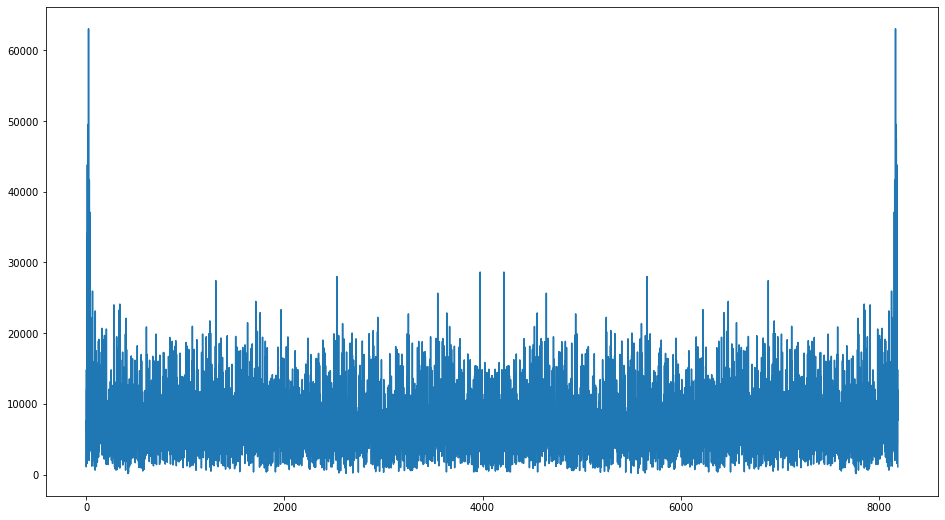

In [47]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(np.abs(fft[0]))

In [35]:
fft = np.abs(fft)

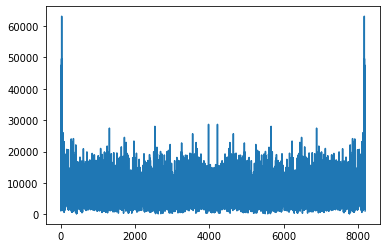

In [36]:
plt.plot(fft[0])

In [39]:
fft[]

(2048, 8192)